> ## **Bar**

### Allowed functions : ```import pandas as pd, import sqlite3```

In [2]:
import pandas as pd
import sqlite3

## анализировать только пользователей, а не администраторов
## размер шрифта и размер фигуры остались прежними
## ночь с 0:00:00 до 03:59:59, утро с 04:00:00 до 09:59:59, день с 10:00:00 до 16:59:59, вечер с 17:00:00 до 23:59:59
## выберите палитру, которая вам действительно нравится, вам не обязательно копировать ее из графика выше
## В конце вашего Jupyter Notebook создайте ячейку Markdown и вставьте вопросы:
```«Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?» — ответом являются два наиболее распространенных периода.```
## В какой день:
### * наибольшее количество коммитов и в то же время количество коммитов вечером больше, чем днем?
## Ответ — дата того дня.

In [18]:
conn=sqlite3.connect('../data/checking-logs.sqlite')
query='''
select uid, timestamp
from checker
where uid not like "admin%"
'''
df_checker=pd.read_sql(query,conn, parse_dates='timestamp')
df_checker['hour']=df_checker['timestamp'].dt.hour
df_checker['date']=df_checker['timestamp'].dt.date
df_checker['daytime']=pd.cut(df_checker['hour'], bins=[-1,4,10,17,24],labels=['night','morning','afternoon','evening'])
df_checker

,uid,timestamp,hour,date,daytime
0,user_4,2020-04-17 05:19:02.744528,5,2020-04-17,morning
1,user_4,2020-04-17 05:22:35.249331,5,2020-04-17,morning
2,user_4,2020-04-17 05:22:45.549397,5,2020-04-17,morning
3,user_4,2020-04-17 05:34:14.691200,5,2020-04-17,morning
4,user_4,2020-04-17 05:34:24.422370,5,2020-04-17,morning
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,20,2020-05-21,evening
3203,user_1,2020-05-21 20:22:41.785725,20,2020-05-21,evening
3204,user_1,2020-05-21 20:22:41.877806,20,2020-05-21,evening
3205,user_1,2020-05-21 20:37:00.129678,20,2020-05-21,evening


In [28]:
df=df_checker.groupby('date')['daytime'].value_counts().unstack(1)
df.head()

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16


<Axes: title={'center': 'Commits per day'}, xlabel='date'>

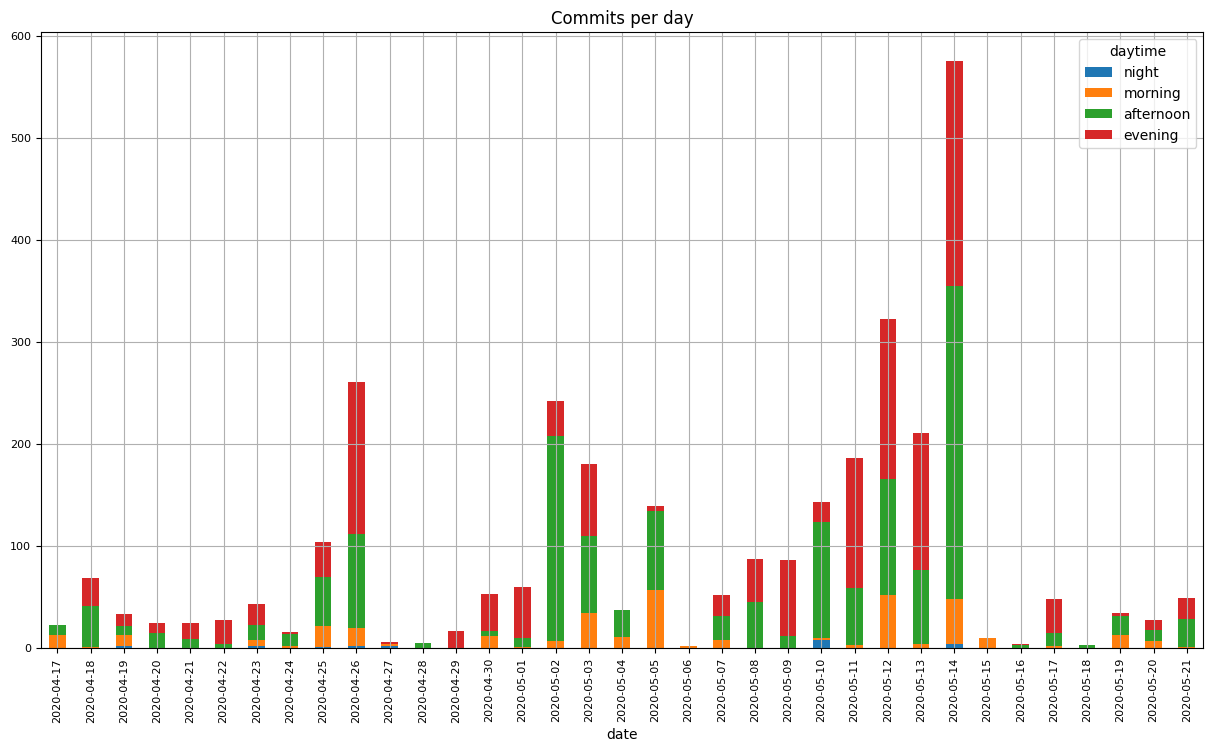

In [35]:
df.plot(
    kind='bar',
    y=['night', 'morning','afternoon','evening'],
    stacked=True,
    fontsize=8,
    figsize=(15,8),
    legend=True,
    title='Commits per day',
    rot= 90,
    grid=True
)


## «Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?»

In [44]:
df.sum().sort_values(ascending=False).head(2)

daytime
afternoon    1473
evening      1369
dtype: int64

## В какой день:
### * наибольшее количество коммитов и в то же время количество коммитов вечером больше, чем днем?

In [62]:
print(df[df['evening']>df['afternoon']].sum(axis=1).idxmax())

2020-05-12


In [63]:
conn.close()